In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_count = pd.read_csv('/Users/tushi/PRJ/WikidataParsing/no_of_edits_all.csv')

In [3]:
data_count.head()

,Unnamed: 0,pagetitle
0,Q27335409,4231
1,Q27335792,4096
2,Q27336022,4042
3,Q27336098,4007
4,Q27336831,3874


In [4]:
data_count.tail()

,Unnamed: 0,pagetitle
8365809,Q19561471,1
8365810,Q10606187,1
8365811,Q612146,1
8365812,Q9197261,1
8365813,Q1918053,1


In [6]:
data_count.shape

(8365814, 2)

Data contains 8,365,814 unique Wikidata items alongside the 
number of occurrences of each that is the number of revisions/edits
within the selected timespan of Oct-Nov-Dec 2016

In [8]:
data_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8365814 entries, 0 to 8365813
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  object
 1   pagetitle   int64 
dtypes: int64(1), object(1)
memory usage: 127.7+ MB


The dataframe contains 2 columns. Column 1 is of type object that is the values are used as is (as per documentation) and the values of the second column are of type int64. It does not contain any null or missing values.

In [9]:
data_count.describe()

,pagetitle
count,8.365814e+06
mean,4.720471e+00
std,1.435651e+01
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,4.231000e+03


Count: 8,365,814

Mean: 4.720471

Standard Deviation: 14.35651

Minimum: 1

25th Percentile: 1

50th Percentile (Median): 2

75th Percentile: 4

Maximum: 4231

# Observations

The Mean value of the occurrences of edits for the Wikidata items is 4.720471. This is the average number of edits for items in the dataset. (Remember mean is significantly influenced by outliers)

Standard deviation is the spread of data as compared to the mean. (How much does individual data differ from the mean of the dataset?) 

Range is the maximum - minimum however that does not tell us much about the data.

25th percentile tells us that about 25% of the wikidata items in the dataset have no of edits that 

50th percentile or the median of the data tells us that 50% of the no of edits were at or below the value 2

75th percentile tells us that 75% of the no of edits in the dataset were at or below the value of 4

Thus as per this, since we are interested in wikidata items that are highly edited, the data that we are interested lies above the 75th percentile. (Only about 25% of the total number of wikidata items that have been collected are useful to the analysis)


In [12]:
# Number of revisions in the data i.e. the unique values of the 
# no of edits for wikidata items
data_count.pagetitle.unique()

array([4231, 4096, 4042, 4007, 3874, 2610, 2097, 1759, 1618, 1611, 1607,
       1462, 1437, 1288, 1283, 1276, 1269, 1266, 1257, 1233, 1222, 1221,
       1199, 1187, 1186, 1178, 1174, 1147, 1101, 1096, 1071, 1049, 1044,
       1032, 1026, 1020, 1004,  975,  966,  948,  930,  924,  920,  913,
        895,  892,  890,  862,  860,  859,  858,  857,  838,  837,  834,
        829,  812,  807,  754,  745,  744,  736,  730,  714,  704,  669,
        661,  617,  616,  589,  586,  578,  570,  568,  556,  555,  552,
        546,  545,  542,  537,  536,  531,  523,  520,  510,  494,  492,
        490,  484,  476,  474,  473,  472,  471,  470,  468,  467,  466,
        461,  458,  457,  455,  449,  446,  442,  439,  438,  437,  436,
        435,  429,  428,  427,  426,  425,  423,  422,  421,  420,  417,
        416,  415,  414,  413,  412,  411,  410,  408,  406,  405,  404,
        403,  402,  399,  398,  396,  394,  392,  391,  390,  387,  386,
        385,  384,  382,  378,  377,  376,  372,  3

In [ ]:
# Need to create a frequency table as per the above values
# To understand things like how many items had an occurence of 1, 2, 3 and so on
# Similarly to see how many items fall above a range of ceratin edits
# (ex: greater than 5 as though before cause then we would want to get rid of it)
# one link specified how to calculate the ranges mathematically

<class 'pandas.core.series.Series'>


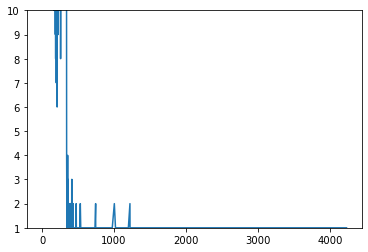

In [74]:
data_item_count = data_count.groupby('pagetitle')['pagetitle'].count()
# data_item_count.columns = ['Edit Values', 'NoOfWikidataItems']
# print(data_item_count.columns)
print(type(data_item_count))
plt.plot(data_item_count.index, data_item_count.values)
ax = plt.gca()
# ax.set_xlim([xmin, xmax])
ymin = 1
ymax = 10
ax.set_ylim([ymin, ymax])
plt.show()
# Just a rough idea; 
# TODO: Create an informative plot of edits vs no of wikidata items for those edits

Above plot does not show anything useful due to the large range of values, however note that the values go upto 4231 which is the max no of edits for one of the wikidata items

Above calculates the number of items(right) which have a specific number of edits(left)

2 million+ items in the datatset of 8million+ unique wikidata items have no of edits as 1.
2 million+ items have no of edits as 2 and similarly as given above. 

More than half the dataset (4 million+ out of 8million+) has edits that fall under a very low value that is less than 5 or 4 as to be chosen according to research later on (this is what needs to be eliminated as we would not be interested in these values as they have a very low number of edits)

In [39]:
data_item_count.to_csv('wikidata_items_editvalues.csv',
                       header=['NoOfWikidataItems'])

In [49]:
# Want to create a plot with the number of edits vs no of wikidata items
# Find most suitable one
# editvalues_x = data_item_count.to_numpy()
# print(editvalues_x)

[2939993 2087685  960710  556612  396137  240110  215929  135406   94671
  122156   64831   62210   36218   32223   29415   41450   34475   27366
   21009   16174   28364   11537    8349   10014    6216    5597    6085
    6697    5449    5964    5919    6681    5989    5230    6033    4883
    4479    3971    4403    2903    3161    2772    2377    2111    2093
    1525    1835    1546    1576    1386    1448    1212    1283    1222
    1189    1052    1147    1016    1108    1187    1546    2213    3901
    5995    6505    5866    3205    1560    1018     750     636     673
     574     510     539     483     476     494     461     510     569
     576     508     619     634     661     634     717     705     712
     685     753    1348    1502    1383    1066     956     838     788
     680     639     606     562     437     410     417     400     358
     348     300     291     252     249     242     171     198     158
     170     140     152     116     173     112   

Can also label the data to see how many edits were done by the diferent types of users